In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans 

/var/folders/d5/rk8cnck91jx69cr6v0xxn4g80000gn/T/ipykernel_55689/1190043168.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
credit_card_df = pd.read_csv("credit_card_dataset.csv")
credit_card_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

The columns from this dataset that peak my interest in particular are Balance and Credit Limit. We shall return to these at a later stage, but as of now, let us have an idea of how they look like in a scatter plot against each other:

<function matplotlib.pyplot.show(close=None, block=None)>

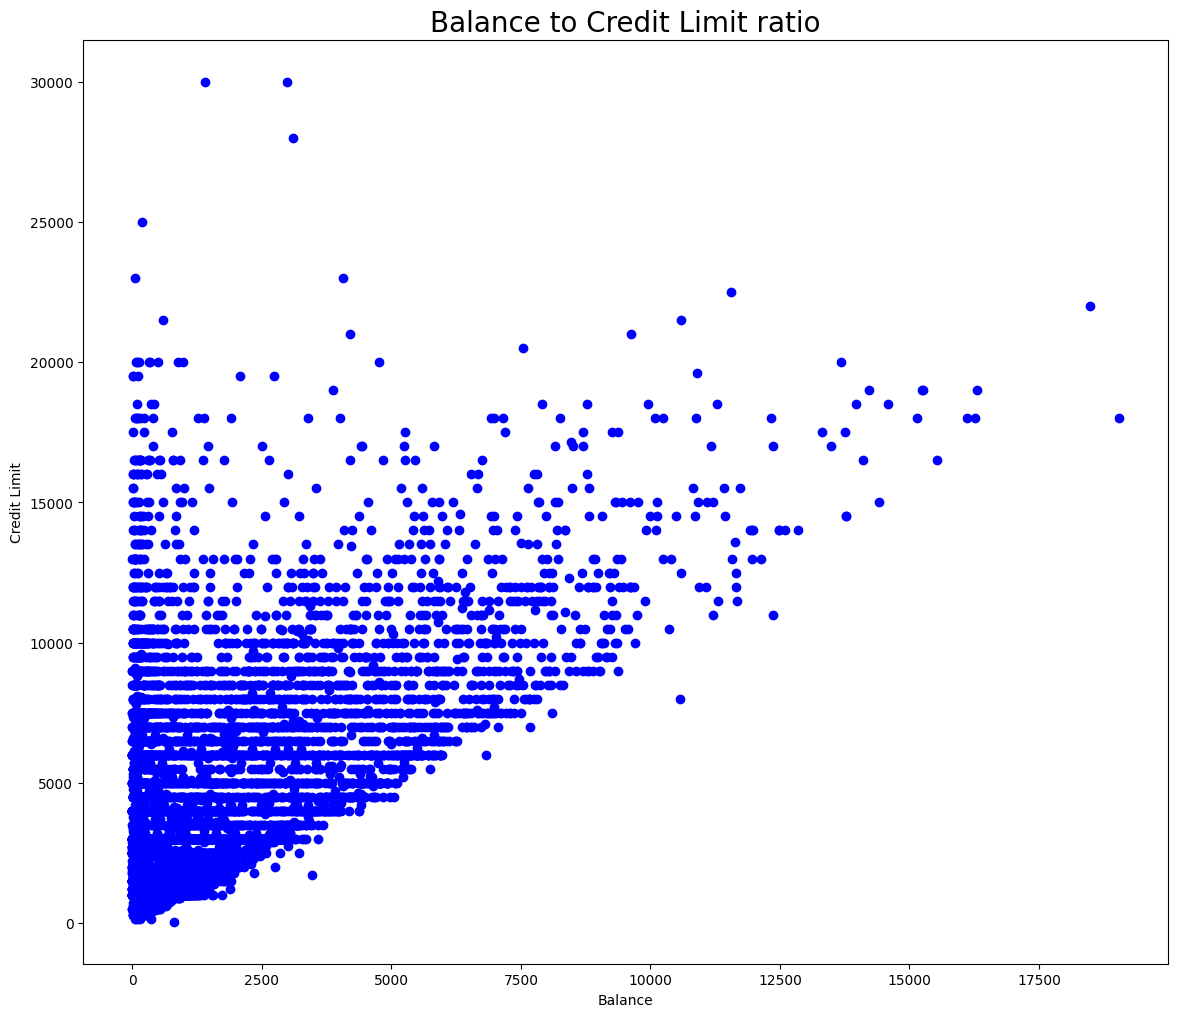

In [7]:
plt.figure(figsize= (14,12))
plt.title("Balance to Credit Limit ratio", fontsize = 20)
plt.scatter(credit_card_df["BALANCE"], credit_card_df["CREDIT_LIMIT"],color="blue")
plt.xlabel("Balance")
plt.ylabel("Credit Limit")
plt.show

DATA CLEANING

Looking at this data we can see that prior to clustering it needs to be cleaned.
Often times data we work with can be quite noisy containing *duplicates*, *outliers* or be *incomplete*. This can be a big problem for a project like this one because improper data can affect the results we get from ML operations such as K-Means Clustering. This can lead to erroneous answers and consequently, erroneous suggestions for our email marketing campaign.

There are certain things we need to be on the lookout for in our data when preforming K-Means Clustering:

----> The values we are working with must be numerical. For instances where we have data which is both categorical and numerical we can use something else like K-prototype Clustering.
----> Our data must not contain any outliers or missing/duplicate values that create noise for K-Means algorithm is notoriously sensitive to them.
----> Our data must be on the same scale having the same mean and variance

*Thus, in this section I will try to eliminate noisiness of this data by taking care of outliers, potential duplicate values and missing values.*



In [8]:

# Lets begin by looking for the presence of duplicate values in our data:

credit_card_df.duplicated().sum()

0

In [10]:
# there are no duplicates. Lets continue by considering the presence of unique values.
credit_card_df.describe(include="all")

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,NaN,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,NaN,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,NaN,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,NaN,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000


In [11]:
# From the dataframe above we can see that 
# each customer identification is unique to each other and for our ease we can remove this column.

credit_card_df.drop('CUST_ID', axis=1, inplace=True)

In [12]:
credit_card_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


We have successfully removed the Customer ID column. Our data does not contain unique or duplicate values

In this section I will attempt to remove outliers from our data. 

First challenge for us will be to locate these outliers.Having completed this step we can eliminate them.

In [13]:

# In order to find outliers in this dataset 
# I will calculate the 
        # Interquatile Range,
        # Estimate the Lower Bound,
        # and Upper Bound. 
# Any Datapoints that lay above the Upper Bound and Below the lower Bound will therefore be treated as Outliers

Q1 = credit_card_df.quantile(0.25)
Q3 = credit_card_df.quantile(0.75)
Inter_quatile_range = Q3 - Q1
print(Inter_quatile_range)

BALANCE                             1925.858120
BALANCE_FREQUENCY                      0.111111
PURCHASES                           1070.495000
ONEOFF_PURCHASES                     577.405000
INSTALLMENTS_PURCHASES               468.637500
CASH_ADVANCE                        1113.821139
PURCHASES_FREQUENCY                    0.833334
ONEOFF_PURCHASES_FREQUENCY             0.300000
PURCHASES_INSTALLMENTS_FREQUENCY       0.750000
CASH_ADVANCE_FREQUENCY                 0.222222
CASH_ADVANCE_TRX                       4.000000
PURCHASES_TRX                         16.000000
CREDIT_LIMIT                        4900.000000
PAYMENTS                            1517.858151
MINIMUM_PAYMENTS                     656.361752
PRC_FULL_PAYMENT                       0.142857
TENURE                                 0.000000
dtype: float64


In [14]:
# Having found the Inter Quartile Range 
# we can now detect the outliers within this dataset using the code below:

print(credit_card_df < (Q1 - 1.5 * Inter_quatile_range)) or (credit_card_df > (Q3 + 1.5 * Inter_quatile_range)) 



      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       False              False      False             False   
1       False              False      False             False   
2       False              False      False             False   
3       False               True      False             False   
4       False              False      False             False   
...       ...                ...        ...               ...   
8945    False              False      False             False   
8946    False              False      False             False   
8947    False              False      False             False   
8948    False              False      False             False   
8949    False               True      False             False   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      False         False                False   
1                      False         False                False   
2                 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
8946,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8947,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8948,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


The code returns Boolean Values which indicate the presence of Outliers in our dataset. 

According to our set conditions, if the value comes out as False it is valid and we keep it. 

If the value is True then it is an Outlier. Since our dataset does in fact contain outliers, we can now proceed to remove them:

In [16]:
credit_card_df_out = credit_card_df[~ ((credit_card_df < (Q1 - 1.5 * Inter_quatile_range)) | (credit_card_df > (Q3 + 1.5 * Inter_quatile_range))).any(axis=1)]
credit_card_df_out.shape

(2994, 17)


Our data no longer contains Outliers.

<h2>Treating Missing Values</h2>
In order to treat missing values we need to first find them. This can be done with the use of *isnull* function. We can also add all of the missing values for each column of the dataframe:

In [17]:
credit_card_df_out.isnull().sum()

BALANCE                              0
BALANCE_FREQUENCY                    0
PURCHASES                            0
ONEOFF_PURCHASES                     0
INSTALLMENTS_PURCHASES               0
CASH_ADVANCE                         0
PURCHASES_FREQUENCY                  0
ONEOFF_PURCHASES_FREQUENCY           0
PURCHASES_INSTALLMENTS_FREQUENCY     0
CASH_ADVANCE_FREQUENCY               0
CASH_ADVANCE_TRX                     0
PURCHASES_TRX                        0
CREDIT_LIMIT                         0
PAYMENTS                             0
MINIMUM_PAYMENTS                    49
PRC_FULL_PAYMENT                     0
TENURE                               0
dtype: int64

We can see that there are 49 missing values for the Minimum_Payments Column. For the missing values in this column we can use the mean average of other values inplace of missing values:

In [19]:

credit_card_df_out['MINIMUM_PAYMENTS'].fillna(credit_card_df_out['MINIMUM_PAYMENTS'].mean())

0       139.509787
4       244.791237
7       532.033990
8       311.963409
14      989.962866
           ...    
8738    451.584847
8742    175.012705
8747     91.328536
8759    167.126034
8760    179.258575
Name: MINIMUM_PAYMENTS, Length: 2994, dtype: float64

In [20]:
credit_card_df_out.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<h3>Scaling</h3>
As we will be performing K-Means clustering on Balance to Credit Limit columns, we can assign these to a variable:

In [21]:
X = credit_card_df_out[["BALANCE", "CREDIT_LIMIT"]]

In [22]:
# We can now scale this Variable for our Clustering:

scaler = StandardScaler()
X_transf = scaler.fit_transform(X)# scaling Balance and Credit Limit
print (X_transf)

[[-1.13359969 -0.90479325]
 [-0.37630323 -0.82224017]
 [ 0.60436139 -0.36819827]
 ...
 [-1.15745725 -0.90479325]
 [-1.1077884  -0.90479325]
 [-0.87406153 -0.90479325]]


Before applyling K-Means Clustering algorithm to our dataset let us first understand how it works and what it is supposed to do. In simple terms, K-Means is a method that aims to partition our observations into a set amount of clusters in which each of our observations belongs to the cluster with the nearest cluster center( i.e. cluster centroid).Upon first iteration these clusters will be set randomly. On the second iteration we adjust the location of centroids by finding the mean of every cluster.This process is repeated until the variance is minimised and the centroids are no longer moving. The algorithm choses the centroids with the lowest total variance.

The problem we are faced when creating clusters is that we are not told exactly how many clusters are there. Theoretically speaking if we would have an equal number of clusters to the number of observations the distance between datapoints to cluster centers would be minimal. Nonetheless, in this case we would not have any meaningful clusters and our problem would be unresolved.For that reason we can utilise the Elbow Method to find the optimal number of clusters (i.e. K).



Text(0.5, 0, 'K Value')

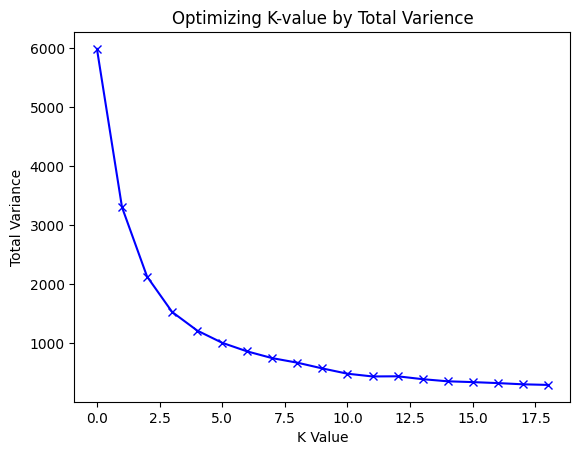

In [23]:
scores = []

range_values=range(1,20)
for i in range_values:
    kmean=KMeans(n_clusters=i)
    kmean.fit(X_transf)
    scores.append(kmean.inertia_)
    
plt.plot(scores,'bx-')
plt.title("Optimizing K-value by Total Varience")
plt.ylabel("Total Variance")
plt.xlabel("K Value")

In [25]:
# In this section I will apply our optimal K value and create our clusters:

model = KMeans(n_clusters = 7)
model.fit(X_transf)#of the scaled data

KMeans(n_clusters=7)

In [26]:
labels = model.labels_#labels for the clusters to which our data belongs

print(len(labels))

2994


In [27]:
centroids = model.cluster_centers_# finding centroids
centroids_transformed = scaler.inverse_transform(centroids)
print(scaler.inverse_transform(centroids))

[[ 487.02006151 8785.38961039]
 [2429.83529865 3327.51937984]
 [4001.62134752 7164.58333333]
 [ 474.38918155 4871.6671084 ]
 [ 301.81823246 1691.63498099]
 [2194.84124959 7332.67973856]
 [1245.78434177 1715.77148438]]


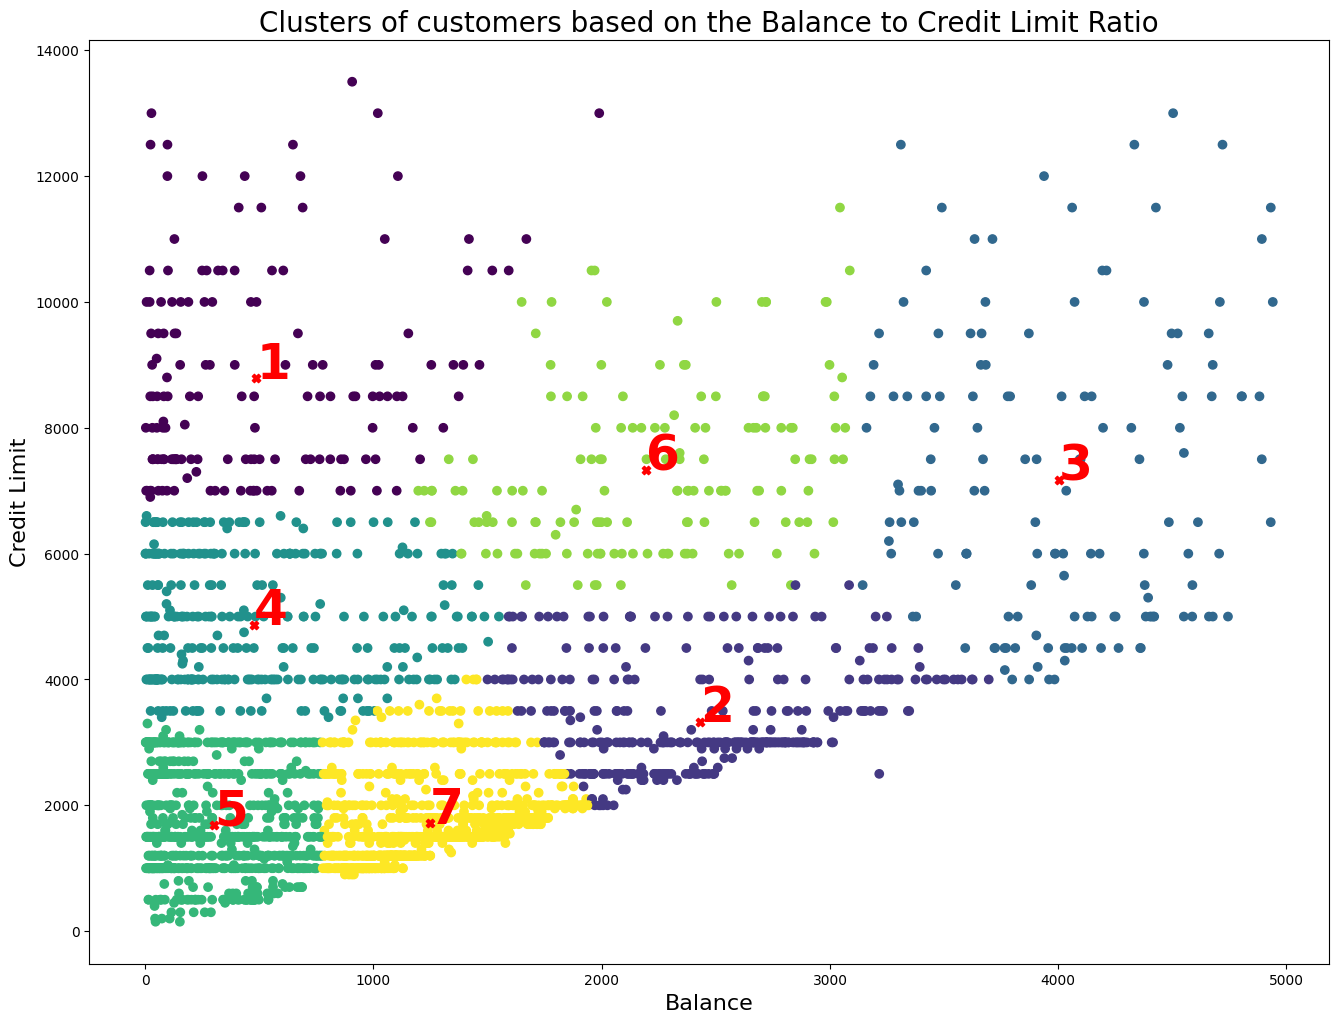

In [28]:
plt.figure(figsize = (16, 12))# visualising our clusters
plt.title("Clusters of customers based on the Balance to Credit Limit Ratio", fontsize = 20)
plt.scatter(credit_card_df_out["BALANCE"], credit_card_df_out["CREDIT_LIMIT"], c = labels)

plt.scatter(centroids_transformed[:, 0], centroids_transformed[:, 1], c = "red", marker = "X")

# add labels to each cluster
label = 1

for i in range(len(centroids_transformed[:, 0])):
    plt.text(centroids_transformed[i, 0],centroids_transformed[i, 1],label,fontsize=35,color="red",weight="bold")
    label += 1


plt.xlabel("Balance", fontsize = 16)
plt.ylabel("Credit Limit", fontsize = 16)
plt.show()

We have successfully managed to create our clusters of customers using a K-Means algorithm. Above is the visual representation for our clusters.

<strong>Conclusion:</strong>

We can use our customer segmentation above to inform and email marketing campaign. Below are the suggestions for the type of outreach each cluster of customers should receive:

<strong><em>For clusters 1 and 5</em></strong> Run a check if they are qualified for a higher credit limit. Bring to their attention that higher credit limit can lower credit utilization, potentially boosting credit score and provides additional emergency fund safety net. Customers in Cluster 1 that lean towards the higher balance may be cautioned that if increased credit limit encourages spending outside of their budget, the benefits of having a higher limit could be outweighed by unmanaged debt.

<strong><em>For cluster 2</em></strong> send help to newer customers to encourage the usage of their credit cards(assuming that they are new give the lowest balance and credit scores from the overall group).Perhaps suggest an appointment where they can receive advice on how to use their credit cards more effectively.

<strong><em>For Clusters 3 and 6</em></strong> the credit limit to credit balance ratio is high. These customers would have a high credit score and thus you could suggest some additional rewards to nurture the relationship with these customers. Customers in cluster 3 in particular can qualify for higher rewards.

Customers in <em><strong>cluster 7</strong></em> are well within their credit limit and their balance does not exceed it. These customers have potential to move into cluster 3 and 6 which is the desired area for the business.

The customers in the remaining <em><strong>cluster 4</strong></em> have relatively high balances compared to their credit limits with some of them even exceeding their limit. These customers should be encouraged to work on ways of improving their credit score and paying off their balance.